<a href="https://colab.research.google.com/github/wesleybeckner/python_foundations/blob/main/notebooks/extras/X1_Spotify_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Foundations <br>X1: The Spotify API

**Instructor**: Wesley Beckner

**Contact**: wesleybeckner@gmail.com

---

<br>

For this workbook we're going to use the [`spotipy`](https://spotipy.readthedocs.io/en/2.19.0/#) library to access the Spotify Web API!

[Solved Notebook](https://wesleybeckner.github.io/python_foundations/solutions/SOLN_X1_Spotify_API/)

<br>

---


## Install and import libraries

First we will need to install it:

In [1]:
!pip install spotipy

     |████████████████████████████████| 63 kB 734 kB/s 
     |████████████████████████████████| 138 kB 22.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


And then import

In [2]:
from spotipy import client
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials, SpotifyOAuth
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Setup developer account

You'll need to visit this [link](https://developer.spotify.com/dashboard/) to setup a developer account, then fill in your authorization information below

In [3]:
SPOTIPY_CLIENT_ID = ""
SPOTIPY_CLIENT_SECRET = ""

## Top 10 tracks of an artist

We can grab the first 10 tracks of Led Zepplin:

In [5]:
lz_uri = 'spotify:artist:36QJpDe2go2KgaRleHCDTp'


results = spotify.artist_top_tracks(lz_uri)
ids = []

for i, track in enumerate(results['tracks']):
    ids.append(track['id'])
    if i < 5:
      print('track    : ' + track['name'])
      print('audio    : ' + track['preview_url'])
      print('cover art: ' + track['album']['images'][0]['url'])
      print()

track    : Stairway to Heaven - Remaster
audio    : https://p.scdn.co/mp3-preview/8226164717312bc411f8635580562d67e191a754?cid=93cef3f9255042d7854a6014e0929504
cover art: https://i.scdn.co/image/ab67616d0000b273c8a11e48c91a982d086afc69

track    : Immigrant Song - Remaster
audio    : https://p.scdn.co/mp3-preview/8455599677a13017978dcd3f4b210937f0a16bcb?cid=93cef3f9255042d7854a6014e0929504
cover art: https://i.scdn.co/image/ab67616d0000b27390a50cfe99a4c19ff3cbfbdb

track    : Whole Lotta Love - 1990 Remaster
audio    : https://p.scdn.co/mp3-preview/ce11b19a4d2de9976d7626df0717d0073863909c?cid=93cef3f9255042d7854a6014e0929504
cover art: https://i.scdn.co/image/ab67616d0000b273fc4f17340773c6c3579fea0d

track    : Black Dog - Remaster
audio    : https://p.scdn.co/mp3-preview/9b76619fd9d563a48d38cc90ca00c3008327b52e?cid=93cef3f9255042d7854a6014e0929504
cover art: https://i.scdn.co/image/ab67616d0000b273c8a11e48c91a982d086afc69

track    : Kashmir - Remaster
audio    : https://p.scdn.co/mp3

the top tracks API only gives the top 10 tracks by an artist:

In [6]:
len(ids)

10

Spotify has an audio features API that can be used for ML or data visualization:

In [7]:
features = spotify.audio_features(ids)
features

[{'acousticness': 0.58,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5CQ30WqJwcep0pYcV4AMNc',
  'danceability': 0.338,
  'duration_ms': 482830,
  'energy': 0.34,
  'id': '5CQ30WqJwcep0pYcV4AMNc',
  'instrumentalness': 0.0032,
  'key': 9,
  'liveness': 0.116,
  'loudness': -12.049,
  'mode': 0,
  'speechiness': 0.0339,
  'tempo': 82.433,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/5CQ30WqJwcep0pYcV4AMNc',
  'type': 'audio_features',
  'uri': 'spotify:track:5CQ30WqJwcep0pYcV4AMNc',
  'valence': 0.197},
 {'acousticness': 0.013,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/78lgmZwycJ3nzsdgmPPGNx',
  'danceability': 0.564,
  'duration_ms': 146250,
  'energy': 0.932,
  'id': '78lgmZwycJ3nzsdgmPPGNx',
  'instrumentalness': 0.169,
  'key': 11,
  'liveness': 0.349,
  'loudness': -10.068,
  'mode': 1,
  'speechiness': 0.0554,
  'tempo': 112.937,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/78lgmZwycJ3nzsdg

In [8]:
pd.DataFrame(features)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.338,0.340,9,-12.049,0,0.0339,0.580000,0.003200,0.1160,0.197,82.433,audio_features,5CQ30WqJwcep0pYcV4AMNc,spotify:track:5CQ30WqJwcep0pYcV4AMNc,https://api.spotify.com/v1/tracks/5CQ30WqJwcep...,https://api.spotify.com/v1/audio-analysis/5CQ3...,482830,4
1,0.564,0.932,11,-10.068,1,0.0554,0.013000,0.169000,0.3490,0.619,112.937,audio_features,78lgmZwycJ3nzsdgmPPGNx,spotify:track:78lgmZwycJ3nzsdgmPPGNx,https://api.spotify.com/v1/tracks/78lgmZwycJ3n...,https://api.spotify.com/v1/audio-analysis/78lg...,146250,4
2,0.412,0.902,9,-11.600,1,0.4050,0.048400,0.131000,0.4050,0.422,89.740,audio_features,0hCB0YR03f6AmQaHbwWDe8,spotify:track:0hCB0YR03f6AmQaHbwWDe8,https://api.spotify.com/v1/tracks/0hCB0YR03f6A...,https://api.spotify.com/v1/audio-analysis/0hCB...,333893,4
3,0.437,0.864,4,-7.842,0,0.0904,0.396000,0.031400,0.2420,0.749,81.394,audio_features,3qT4bUD1MaWpGrTwcvguhb,spotify:track:3qT4bUD1MaWpGrTwcvguhb,https://api.spotify.com/v1/tracks/3qT4bUD1MaWp...,https://api.spotify.com/v1/audio-analysis/3qT4...,295387,4
4,0.483,0.615,2,-8.538,1,0.0497,0.452000,0.000414,0.0512,0.594,80.576,audio_features,6Vjk8MNXpQpi0F4BefdTyq,spotify:track:6Vjk8MNXpQpi0F4BefdTyq,https://api.spotify.com/v1/tracks/6Vjk8MNXpQpi...,https://api.spotify.com/v1/audio-analysis/6Vjk...,517125,3
5,0.468,0.607,9,-11.367,1,0.0336,0.072000,0.000852,0.2250,0.886,98.429,audio_features,3MODES4TNtygekLl146Dxd,spotify:track:3MODES4TNtygekLl146Dxd,https://api.spotify.com/v1/tracks/3MODES4TNtyg...,https://api.spotify.com/v1/audio-analysis/3MOD...,263333,4
6,0.317,0.887,9,-7.292,1,0.0375,0.000582,0.002580,0.0891,0.871,169.613,audio_features,4PRGxHpCpF2yoOHYKQIEwD,spotify:track:4PRGxHpCpF2yoOHYKQIEwD,https://api.spotify.com/v1/tracks/4PRGxHpCpF2y...,https://api.spotify.com/v1/audio-analysis/4PRG...,220561,4
7,0.503,0.265,2,-15.913,1,0.0333,0.943000,0.045000,0.0867,0.522,78.044,audio_features,70gbuMqwNBE2Y5rkQJE9By,spotify:track:70gbuMqwNBE2Y5rkQJE9By,https://api.spotify.com/v1/tracks/70gbuMqwNBE2...,https://api.spotify.com/v1/audio-analysis/70gb...,212161,4
8,0.476,0.717,9,-9.192,1,0.0949,0.038200,0.000076,0.0818,0.753,93.584,audio_features,0QwZfbw26QeUoIy82Z2jYp,spotify:track:0QwZfbw26QeUoIy82Z2jYp,https://api.spotify.com/v1/tracks/0QwZfbw26QeU...,https://api.spotify.com/v1/audio-analysis/0QwZ...,166267,4
9,0.525,0.929,9,-8.560,0,0.0784,0.262000,0.000029,0.0754,0.556,163.503,audio_features,4ItljeeAXtHsnsnnQojaO2,spotify:track:4ItljeeAXtHsnsnnQojaO2,https://api.spotify.com/v1/tracks/4ItljeeAXtHs...,https://api.spotify.com/v1/audio-analysis/4Itl...,262748,4


### Add additional artists

Let's get some other artist data to compare with:

In [9]:
artist_dict = {'zep': '36QJpDe2go2KgaRleHCDTp',
               'tswift': '06HL4z0CvFAxyc27GXpf02',
               'debussy': '1Uff91EOsvd99rtAupatMP',
               'luttrell': '4EOyJnoiiOJ4vuNhSBArB2',
               'johnwill': '3dRfiJ2650SZu6GbydcHNb'}

color_dict = {'zep': 'tab:blue',
               'tswift': 'tab:green',
               'debussy': 'tab:orange',
               'luttrell': 'tab:red',
               'johnwill': 'tab:pink'}

In [10]:
ids = []
artists = []
colors = []
for artist, uri in artist_dict.items():
  results = spotify.artist_top_tracks('spotify:artist:' + uri)
  

  for i, track in enumerate(results['tracks']):
      ids.append(track['id'])
      artists.append(artist)
      colors.append(color_dict[artist])
      if i < 1:
        print('track    : ' + track['name'])
        print('cover art: ' + track['album']['images'][0]['url'])
        print()

track    : Stairway to Heaven - Remaster
cover art: https://i.scdn.co/image/ab67616d0000b273c8a11e48c91a982d086afc69

track    : All Too Well (10 Minute Version) (Taylor's Version) (From The Vault)
cover art: https://i.scdn.co/image/ab67616d0000b273318443aab3531a0558e79a4d

track    : Clair de Lune, L. 32
cover art: https://i.scdn.co/image/ab67616d0000b2736e7bb273ff9cb1de1e1d4d0a

track    : Twin Souls
cover art: https://i.scdn.co/image/ab67616d0000b2735dea3da9d2751a0fa7b23fd3

track    : Carol of the Bells
cover art: https://i.scdn.co/image/ab67616d0000b273a68c06155b7c3cf82b00cb96



In [11]:
features = spotify.audio_features(ids)
df = pd.DataFrame(features)
df['artist'] = artists
df['color'] = colors
feat_names = df.columns[:11]
print(feat_names)

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')


In [12]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,artist,color
0,0.338,0.340,9,-12.049,0,0.0339,0.5800,0.003200,0.1160,0.197,82.433,audio_features,5CQ30WqJwcep0pYcV4AMNc,spotify:track:5CQ30WqJwcep0pYcV4AMNc,https://api.spotify.com/v1/tracks/5CQ30WqJwcep...,https://api.spotify.com/v1/audio-analysis/5CQ3...,482830,4,zep,tab:blue
1,0.564,0.932,11,-10.068,1,0.0554,0.0130,0.169000,0.3490,0.619,112.937,audio_features,78lgmZwycJ3nzsdgmPPGNx,spotify:track:78lgmZwycJ3nzsdgmPPGNx,https://api.spotify.com/v1/tracks/78lgmZwycJ3n...,https://api.spotify.com/v1/audio-analysis/78lg...,146250,4,zep,tab:blue
2,0.412,0.902,9,-11.600,1,0.4050,0.0484,0.131000,0.4050,0.422,89.740,audio_features,0hCB0YR03f6AmQaHbwWDe8,spotify:track:0hCB0YR03f6AmQaHbwWDe8,https://api.spotify.com/v1/tracks/0hCB0YR03f6A...,https://api.spotify.com/v1/audio-analysis/0hCB...,333893,4,zep,tab:blue
3,0.437,0.864,4,-7.842,0,0.0904,0.3960,0.031400,0.2420,0.749,81.394,audio_features,3qT4bUD1MaWpGrTwcvguhb,spotify:track:3qT4bUD1MaWpGrTwcvguhb,https://api.spotify.com/v1/tracks/3qT4bUD1MaWp...,https://api.spotify.com/v1/audio-analysis/3qT4...,295387,4,zep,tab:blue
4,0.483,0.615,2,-8.538,1,0.0497,0.4520,0.000414,0.0512,0.594,80.576,audio_features,6Vjk8MNXpQpi0F4BefdTyq,spotify:track:6Vjk8MNXpQpi0F4BefdTyq,https://api.spotify.com/v1/tracks/6Vjk8MNXpQpi...,https://api.spotify.com/v1/audio-analysis/6Vjk...,517125,3,zep,tab:blue


### Visualize the audio features

In [13]:
df.groupby('artist')[feat_names].mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
artist,,,,,,,,,,,
debussy,0.2868,0.019716,3.6,-30.3510,0.8,0.04209,0.990800,0.927000,0.07817,0.07747,81.2996
johnwill,0.2783,0.151770,3.9,-20.4347,0.5,0.03766,0.903000,0.615920,0.18085,0.19182,87.2151
luttrell,0.5310,0.706000,4.5,-9.3468,0.7,0.03504,0.127682,0.669259,0.18714,0.16701,117.5059
tswift,0.5073,0.621700,4.2,-6.4014,0.9,0.05926,0.198158,0.000263,0.13591,0.40550,125.7815
zep,0.4523,0.705800,7.3,-10.2421,0.7,0.09121,0.280518,0.038355,0.17212,0.61690,105.0253


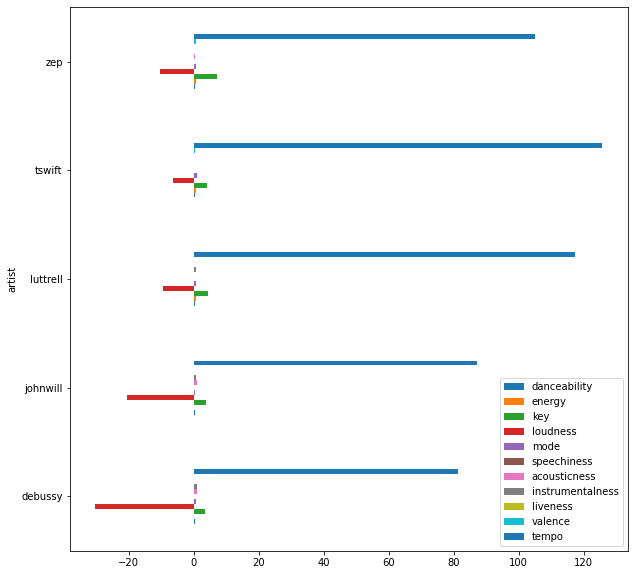

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
df.groupby('artist')[feat_names].mean().plot(kind='barh', ax=ax)

we see that it is difficult to see all the features together at once. One tactic may be to normalize the features

In [15]:
scaled = df[feat_names].apply(lambda x: (x - x.mean()) / (x.std()))
scaled['artist'] = df['artist']

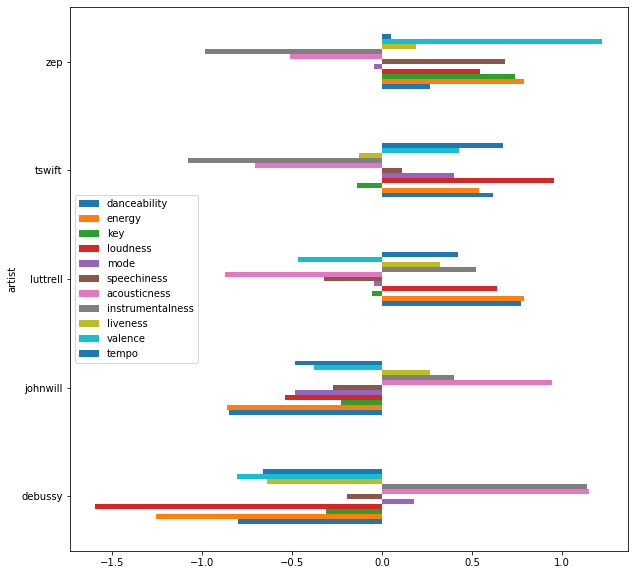

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
scaled.groupby('artist')[feat_names].mean().plot(kind='barh', ax=ax)

We can then investigate if these scaled and centered features separate out under a dimensionality reduction (a topic we explore in unsupervised learning):

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled[feat_names])

PCA(n_components=2)

Text(0, 0.5, 'Second PC')

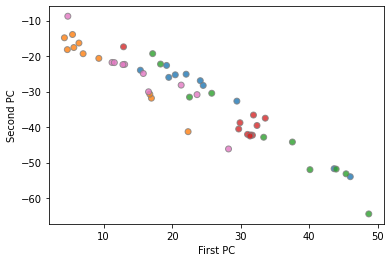

In [18]:
X_pca = pca.transform(df[feat_names])

plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8, c=df['color'].values,
            edgecolor='grey')
plt.xlabel('First PC')
plt.ylabel('Second PC')

## 🏋️‍♀️ Exercises

### 🕵️‍♀️ Exercise 1: Find artist urls and build dataset

a. Navigate to the Spotify web application, pick 5 artists and update the the dictionary below

In [ ]:
# Cell for 1.a

artist_dict = {'zep': '36QJpDe2go2KgaRleHCDTp',
               'tswift': '06HL4z0CvFAxyc27GXpf02',
               'debussy': '1Uff91EOsvd99rtAupatMP',
               'luttrell': '4EOyJnoiiOJ4vuNhSBArB2',
               'johnwill': '3dRfiJ2650SZu6GbydcHNb'}

color_dict = {'zep': 'tab:blue',
               'tswift': 'tab:green',
               'debussy': 'tab:orange',
               'luttrell': 'tab:red',
               'johnwill': 'tab:pink'}

b. build feature set using `spotify.artist_top_tracks('spotify:artist:' + uri)` and storing the resultant track information

In [ ]:
# Cell for 1.b

### 💫 Exercise 2: Visualize Features

a. Create a boxplot of each feature, grouped by artist (similar to example above)

In [21]:
# Cell for 2.a

b. Normalize the features this time, then create the boxplot

In [22]:
# Cell for 2.b

### ⚖️ Exercise 3: Write a function that returns a similarity score between two artists


In [23]:
# Cell for 3